In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pyiga import approx, bspline

# Superformula generation function
def superformula(m, n1, n2, n3, a=1, b=1, num_points=100):
    phi = np.linspace(0, 2 * np.pi, num_points)
    r = (np.abs(np.cos(m * phi / 4) / a)**n2 + np.abs(np.sin(m * phi / 4) / b)**n3)**(-1 / n1)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return np.vstack((x, y)).T


# Generate a dataset of superformula points
superformula_params = [(m, n1, n2, n3) for m in range(1, 10) for n1 in range(1, 5) for n2 in range(1, 5) for n3 in range(1, 5)]
superformula_points = [superformula(*params) for params in superformula_params]

def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(r, L0, n, a=0.5, d=1, num_res=100):
    theta = np.linspace(0, 2 * np.pi, num_res)
    c = cal_c(r,a,L0)
    result = c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return np.vstack((x, y)).T

# Generate a dataset of superformula points
superformula_params = [(round(r, 2), L0, n, (round(a, 2))) for r in np.arange(0.2, 0.9, 0.1).tolist() for L0 in np.arange(15, 35, 5).tolist()
                       for n in np.arange(2, 12, 1).tolist() for a in np.arange(0.2, 0.7, 0.1).tolist()]
superformula_points = np.array([superformula(*params) for params in superformula_params])
print(superformula_points.shape)

(1400, 100, 2)


c:\Users\mechadmin\Documents\GitHub\pyiga\.venv\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


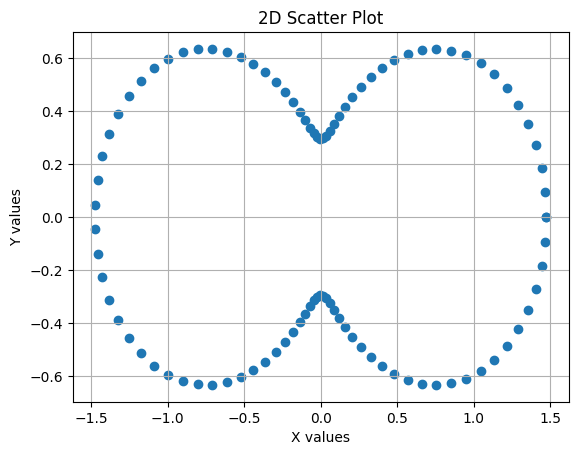

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample 2D array
array_2d = superformula_points[0]

x = array_2d[:, 0]
y = array_2d[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.title('2D Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()


In [10]:
ori_data = np.load('C:\\Users\\mechadmin\\Documents\\GitHub\\pyiga\\EGAN\\egan_airfoil\\models\\test2.npy')
pre_data = np.load('C:\\Users\\mechadmin\\Documents\\GitHub\\pyiga\\EGAN\\egan_airfoil\\models\\train.npy')

In [6]:
ori_data.shape

(100, 192, 2)

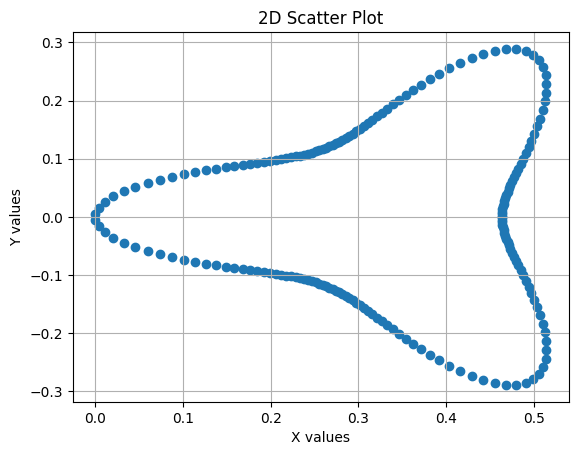

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample 2D array
array_2d = ori_data[20]

x = array_2d[:, 0]
y = array_2d[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.title('2D Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()


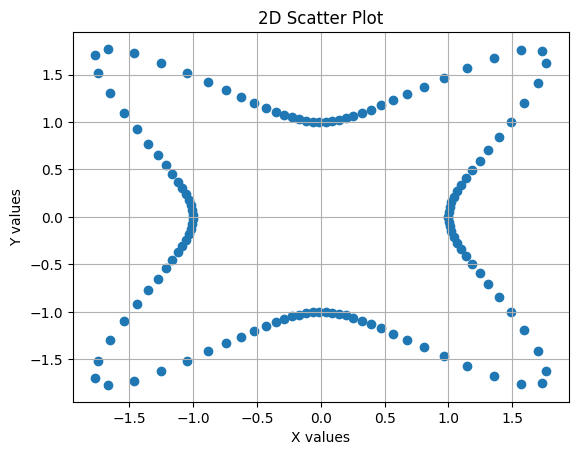

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample 2D array
array_2d = pre_data[20]

x = array_2d[:, 0]
y = array_2d[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.title('2D Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()
